In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
tp = pd.read_csv("tips.csv")
tp

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [19]:
tp['sex']=tp['sex'].astype('category') 
tp['smoker']=tp['smoker'].astype('category') 
tp['day']=tp['day'].astype('category') 
tp['time']=tp['time'].astype('category') 
tp.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [13]:
tp.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [14]:
tp.sort_values(by = 'tip').head()

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
236,12.60,1.00,Male,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
0,16.99,1.01,Female,No,Sun,Dinner,2


In [15]:
tp.sort_values(by ='total_bill',ascending = False).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [17]:
tp.describe(include=['category'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [18]:
tp.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### The mean bill amount is 19.78 dollars and the mean tip amount in 3 dollars

In [22]:
tp['tip'].var()

1.9144546380624725

In [23]:
tp['total_bill'].var()

79.25293861397826

In [24]:
tp['size'].var()

0.9045908385616921

In [25]:
print("The minimum bill amount is $",tp["total_bill"].min(),"while the maximum bill amount is $",tp['total_bill'].max(),"giving the range of",tp['total_bill'].max() - tp['total_bill'].min())

The minimum bill amount is $ 3.07 while the maximum bill amount is $ 50.81 giving the range of 47.74


In [26]:
print("The minimum tip amount is $",tp["tip"].min(),"while the maximum tip amount is $",tp['tip'].max(),"giving the range of",tp['tip'].max() - tp['tip'].min())

The minimum tip amount is $ 1.0 while the maximum tip amount is $ 10.0 giving the range of 9.0


In [27]:
print("The number of people in each party varies from",tp['size'].min(),"to",tp['size'].max())

The number of people in each party varies from 1 to 6


<Axes: >

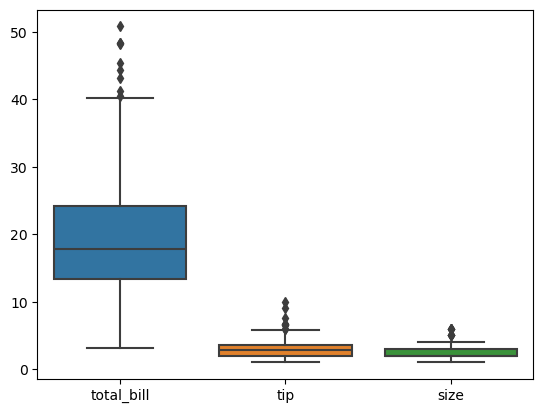

In [28]:
sns.boxplot(tp)

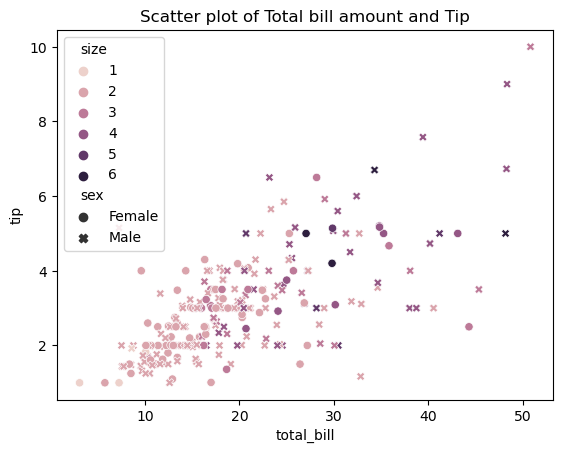

In [29]:
sns.scatterplot(x=tp['total_bill'],y=tp['tip'], hue=tp["size"], style=tp["sex"])
# add title
plt.title("Scatter plot of Total bill amount and Tip");

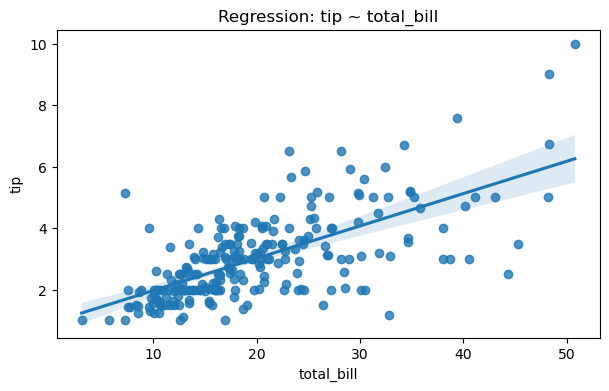

In [30]:
plt.figure(figsize=(7, 4))
sns.regplot(x="total_bill", y="tip", data=tp)
plt.title("Regression: tip ~ total_bill");

In [31]:
x,y = tp['total_bill'], tp['tip']

In [32]:
np.polyfit(x,y,1)

array([0.10502452, 0.92026961])

In [33]:
x, y = tp.total_bill, tp.tip
# First calculate the mean total bill amount (mean of x) and the mean tip amount (mean of y)
x_avg, y_avg = np.mean(tp.total_bill), np.mean(tp.tip)
print("The mean bill amount is $%.3f " %x_avg, "and mean tip amount is $%.3f \n" %y_avg)
#  subtract means from each of the individual total_bill and tip values
x_zero= tp['total_bill'] - np.mean(tp['total_bill'])
y_zero= tp['tip'] - np.mean(tp['tip'])

# The best slope m is found by the following calculations:
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)

# The best slope m from above is used to calculate the best intercept c
c = y_avg - m* x_avg

print("The slope m is calculated above to be %.4f and the intercept c  to be %.4f." %(m,c))

The mean bill amount is $19.786  and mean tip amount is $2.998 

The slope m is calculated above to be 0.1050 and the intercept c  to be 0.9203.


In [34]:
cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])
print("The cost using the above calculated slope  (m = %.3f) and intercept (c = %5.3f): %8.2f" % (m, c, cost(m, c)))
## first for a guess using tip rate of 15% and minimum tip as intercept of 1
print("Cost with m = %.3f and c = %5.3f: %8.2f" % (0.15, 1.1, cost(0.15, 1.1)))
# using the estimates from the polyfit function
print("Cost with m = %.3f and c = %5.3f: %8.2f" % (0.105, 0.9203, cost(0.105, 0.9203)))

The cost using the above calculated slope  (m = 0.105) and intercept (c = 0.920):   252.79
Cost with m = 0.150 and c = 1.100:   570.90
Cost with m = 0.105 and c = 0.920:   252.79


In [35]:
B0, B1 =  0.9203, 0.105,
# just selecting a range of total bills between 30 and 40 in steps of 3
for x in range(30,40,3):
    tips_y = B0 + B1*x 
    print(f"For a meal with a total bill of {x:.2f} the expected value of the tip amount is {tips_y:.2f}")

For a meal with a total bill of 30.00 the expected value of the tip amount is 4.07
For a meal with a total bill of 33.00 the expected value of the tip amount is 4.39
For a meal with a total bill of 36.00 the expected value of the tip amount is 4.70
For a meal with a total bill of 39.00 the expected value of the tip amount is 5.02


In [36]:
np.corrcoef(tp['total_bill'],tp['tip'])
# just get a single value for correlation between total bill and tip from the correlation matrix
print(f" R-squared is:{np.corrcoef(tp['total_bill'],tp['tip'])[0][1]**2:.4f} ")

 R-squared is:0.4566 


In [37]:
from statsmodels.formula.api import ols
# fit the model
model = ols('tip ~ total_bill', data=tp).fit()
# the detailed statistics derived from the fit
model.summary()
# just the paramters for the intercept and coefficient
print(model.summary())
print(model.params)

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           6.69e-34
Time:                        14:27:47   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

In [39]:
print("The correlation coefficient between total bill and tip amount is %.3f" %tp['total_bill'].corr(tp['tip']))
print(f"The coefficient of determination R squared is {np.corrcoef(tp['total_bill'],tp['tip'])[0][1]**2:.4f}")
print(f"The estimates for the slope and intercept parameters are {np.polyfit(tp['total_bill'],tp['tip'],1)[1]:.4f} and {np.polyfit(tp['total_bill'],tp['tip'],1)[0]:.4f} ")

The correlation coefficient between total bill and tip amount is 0.676
The coefficient of determination R squared is 0.4566
The estimates for the slope and intercept parameters are 0.9203 and 0.1050 


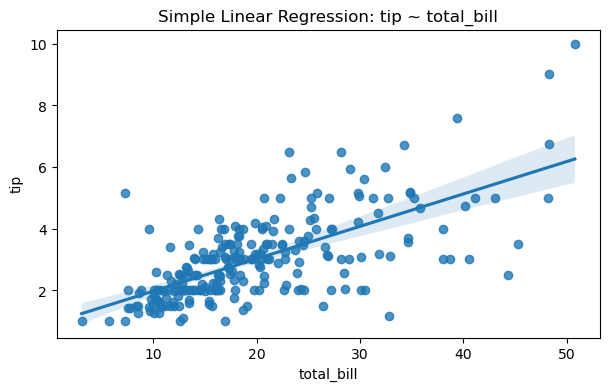

In [38]:
plt.figure(figsize=(7, 4))
sns.regplot(x="total_bill", y="tip", data=tp)
plt.title("Simple Linear Regression: tip ~ total_bill");